Gross National Income (GNI)
-----------------------------
This indicator is defined:

http://data.worldbank.org/indicator/NY.GNP.PCAP.PP.CD

We can download the UN 'GNI per capita, PPP (current international $)' dataset from:

http://data.un.org/Data.aspx?d=WDI&f=Indicator_Code:NY.GNP.PCAP.PP.CD&c=2,4,5&s=Country_Name:asc,Year:desc&v=1

The raw data looks like:

In [1]:
import pandas
pandas.read_csv('../data/un/wdi-gni-per-capita-ppp.csv').head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2013,1960,NaN
1,Afghanistan,2012,1940,NaN
2,Afghanistan,2011,1700,NaN
3,Afghanistan,2010,1610,NaN
4,Afghanistan,2009,1500,NaN


That's good - but we don't need all the historical data - let's just extract the data from 2012:

In [2]:
df_gni = pandas.read_csv('../data/un/wdi-gni-per-capita-ppp.csv')
# find only the rows from 2012
df_gni_2012 = df_gni[df_gni['Year'] == '2012'].copy()
# drop the 'Value Footnotes' and 'Year' columns
df_gni_2012.drop('Value Footnotes', axis=1, inplace=True)
df_gni_2012.drop('Year', axis=1, inplace=True)
# rename the remaining columns and set the index
df_gni_2012.columns = ['Country', 'GNI']
df_gni_2012.set_index('Country', inplace=True)
df_gni_2012.head()

,GNI
Country,
Afghanistan,1940
Albania,9930
Algeria,12860
Angola,6580
Antigua and Barbuda,20060


Life expectancy
----------------
Now we load the UN life ecpectancy data, retrieved from:

http://data.un.org/Data.aspx?d=WHO&f=MEASURE_CODE:WHOSIS_000001&c=2,4,6,10&s=_crEngNameOrderBy:asc,_timeEngNameOrderBy:desc&v=1

In [3]:
pandas.read_csv('../data/un/who-life-expectancy-at-birth.csv').head()

,Country or Area,Year(s),GENDER,Value,Value Footnotes
0,Afghanistan,2012,Male,58,NaN
1,Afghanistan,2012,Female,61,NaN
2,Afghanistan,2012,Both sexes,60,NaN
3,Afghanistan,2000,Male,54,NaN
4,Afghanistan,2000,Female,56,NaN


Again, we're only interested in the current data, so let's extract what we need:

In [4]:
df_life = pandas.read_csv('../data/un/who-life-expectancy-at-birth.csv')
# find only the rows from 2012
df_life.rename(columns={'Year(s)':'Year'}, inplace=True)
df_life_2012 = df_life[df_life['Year'] == 2012].copy()
# drop the 'Value Footnotes' and 'Year' columns
df_life_2012.drop('Value Footnotes', axis=1, inplace=True)
df_life_2012.drop('Year', axis=1, inplace=True)
# rename the remaining columns
df_life_2012.columns = ['Country', 'Gender', 'Expectancy']
# set the index to a composite key
df_life_2012.set_index('Country', inplace=True)
df_life_2012.head()

,Gender,Expectancy
Country,,
Afghanistan,Male,58
Afghanistan,Female,61
Afghanistan,Both sexes,60
Albania,Male,73
Albania,Female,75


Combining GNI and life expectancy datasets
--------------------------------------------
We can 'join' the datasets on the 'Country' column, as we would with database tables.

In [5]:
# Note: we use an inner join as we're only interested in countries that we have both data for
df_combined = df_gni_2012.join(df_life_2012, how='inner')
df_combined = df_combined[df_combined['Gender'] != 'Both sexes']
df_combined.head()

,GNI,Gender,Expectancy
Country,,,
Afghanistan,1940,Male,58
Afghanistan,1940,Female,61
Albania,9930,Male,73
Albania,9930,Female,75
Algeria,12860,Male,70


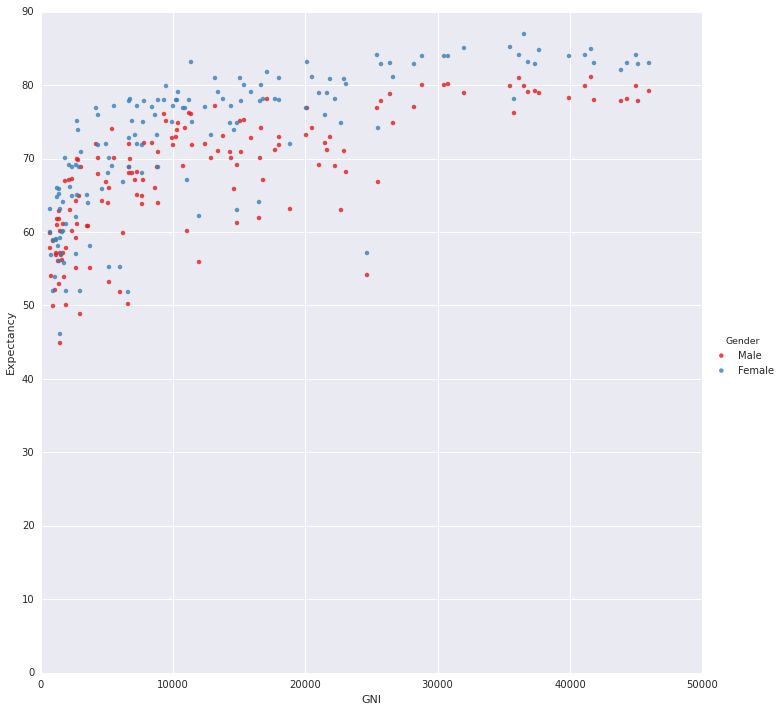

In [6]:
import seaborn
%matplotlib inline
grid = seaborn.lmplot('GNI', 'Expectancy', data=df_combined, hue='Gender', fit_reg=False, size=10, y_jitter=0.2, palette='Set1')
grid.set(xlim=(0, 50000), ylim=(0, 90))